In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("/content/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("Null values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Null values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicates: 1


In [5]:
# Drop duplicates
df = df.drop_duplicates()

In [6]:
from scipy.stats import zscore

# Calculate z-scores for numeric features (excluding 'target')
numeric_cols = df.columns.drop('target')
z_scores = np.abs(zscore(df[numeric_cols]))

# Keep only rows where all z-scores are below threshold (e.g., 3)
df = df[(z_scores < 3).all(axis=1)]

print("Shape after Z-score outlier removal:", df.shape)


Shape after Z-score outlier removal: (287, 14)


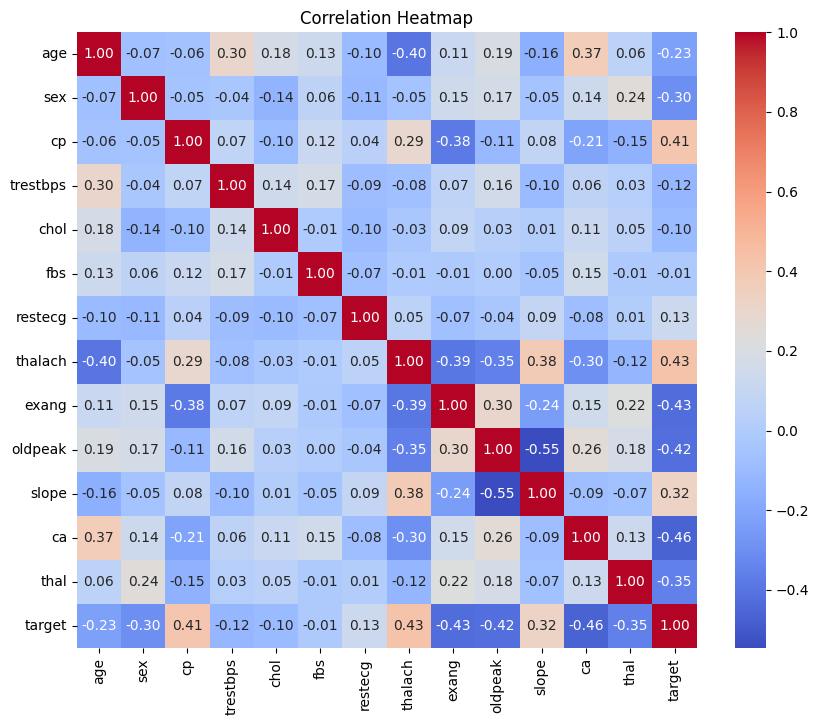

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.8733624454148472
Test Accuracy: 0.8103448275862069


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

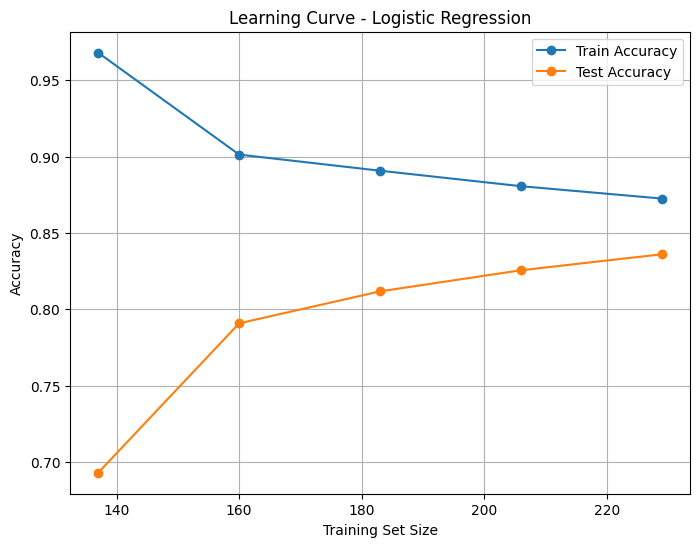

In [10]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Train Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Test Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
from sklearn.metrics import classification_report

# Predictions
y_test_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.85      0.83      0.84        35

    accuracy                           0.81        58
   macro avg       0.80      0.81      0.80        58
weighted avg       0.81      0.81      0.81        58



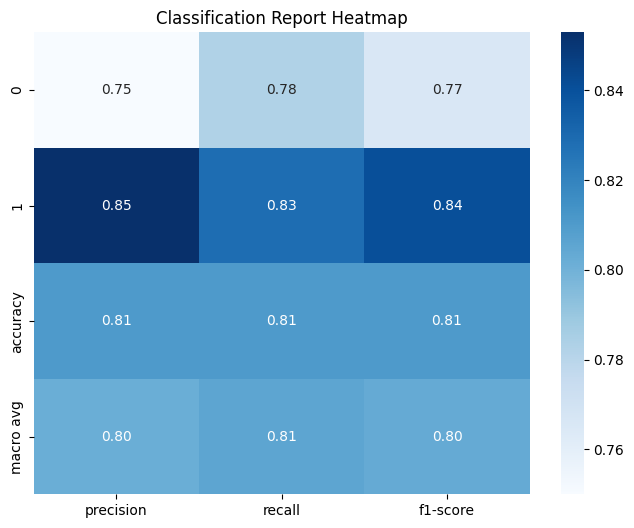

In [12]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get report as dictionary
report = classification_report(y_test, y_test_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


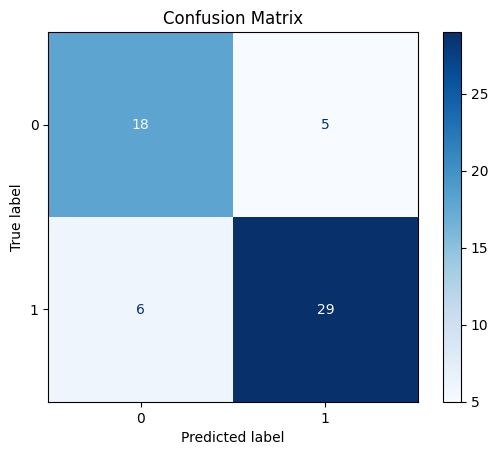

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



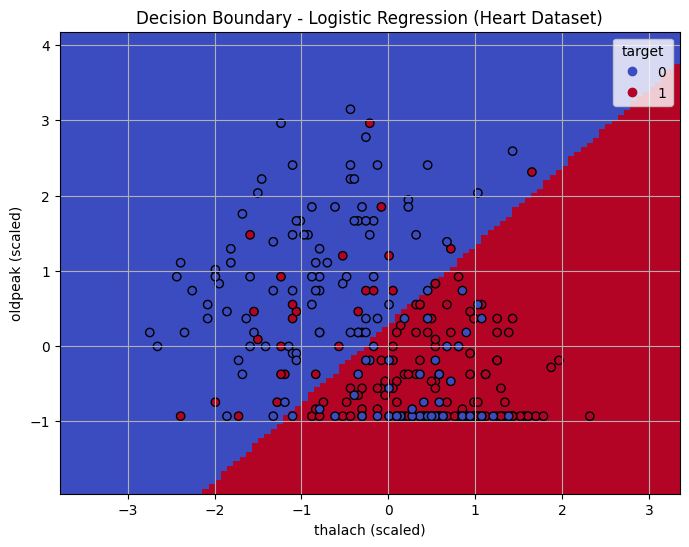

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

# Select 2 features
X_vis = df[['thalach', 'oldpeak']]
y_vis = df['target']

# Scale
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Fit model
model_vis = LogisticRegression()
model_vis.fit(X_vis_scaled, y_vis)

# Plot decision boundary
_, ax = plt.subplots(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    model_vis,
    X_vis_scaled,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    ax=ax,
    xlabel="thalach (scaled)",
    ylabel="oldpeak (scaled)",
    plot_method="pcolormesh",
    shading="auto"
)

# Scatter actual data points
scatter = ax.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolor="k", cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - Logistic Regression (Heart Dataset)")
plt.legend(*scatter.legend_elements(), title="target")
plt.grid(True)
plt.show()
